### Activation function

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Set seed such that we always get the same dataset
np.random.seed(42)

def generate_dataset(num_sequences=100):
    """
    Generates a number of sequences as our dataset.
    
    Args:
     `num_sequences`: the number of sequences to be generated.
     
    Returns a list of sequences.
    """
    samples = []
    
    for _ in range(num_sequences): 
        num_tokens = np.random.randint(1, 10)
        sample = ['a'] * num_tokens + ['b'] * num_tokens + ['EOS']
        samples.append(sample)
        
    return samples


sequences = generate_dataset()

print('A single sample from the generated dataset:')
print(sequences[0]) 
from collections import defaultdict

def sequences_to_dicts(sequences):
  
    # A bit of Python-magic to flatten a nested list
    flatten = lambda l: [item for sublist in l for item in sublist]
    
    # Flatten the dataset
    all_words = flatten(sequences)
    
    # Count number of word occurences
    word_count = defaultdict(int)
    for word in flatten(sequences):
        word_count[word] += 1

    # Sort by frequency
    word_count = sorted(list(word_count.items()), key=lambda l: -l[1])

    # Create a list of all unique words
    unique_words = [item[0] for item in word_count]
    
    # Add UNK token to list of words
    unique_words.append('UNK')

    # Count number of sequences and number of unique words
    num_sentences, vocab_size = len(sequences), len(unique_words)

    # Create dictionaries so that we can go from word to index and back
    # If a word is not in our vocabulary, we assign it to token 'UNK'
    word_to_idx = defaultdict(lambda: num_words)
    idx_to_word = defaultdict(lambda: 'UNK')

    # Fill dictionaries
    for idx, word in enumerate(unique_words):
        # YOUR CODE HERE!
        word_to_idx[word] = idx
        idx_to_word[idx] = word

    return word_to_idx, idx_to_word, num_sentences, vocab_size


word_to_idx, idx_to_word, num_sequences, vocab_size = sequences_to_dicts(sequences)

print(f'We have {num_sequences} sentences and {len(word_to_idx)} unique tokens in our dataset (including UNK).\n')
print('The index of \'b\' is', word_to_idx['b'])
print(f'The word corresponding to index 1 is \'{idx_to_word[1]}\'')


def one_hot_encode(idx, vocab_size):
    """
    One-hot encodes a single word given its index and the size of the vocabulary.
    
    Args:
     `idx`: the index of the given word
     `vocab_size`: the size of the vocabulary
    
    Returns a 1-D numpy array of length `vocab_size`.
    """
    # Initialize the encoded array
    one_hot = np.zeros(vocab_size)
    
    # Set the appropriate element to one
    one_hot[idx] = 1.0

    return one_hot


def one_hot_encode_sequence(sequence, vocab_size):
 
    """
    One-hot encodes a sequence of words given a fixed vocabulary size.
    
    Args:
     `sentence`: a list of words to encode
     `vocab_size`: the size of the vocabulary
     
    Returns a 3-D numpy array of shape (num words, vocab size, 1).
    """
    # Encode each word in the sentence
    encoding = np.array([one_hot_encode(word_to_idx[word], vocab_size) for word in sequence])

    # Reshape encoding s.t. it has shape (num words, vocab size, 1)
    encoding = encoding.reshape(encoding.shape[0], encoding.shape[1], 1)
    
    return encoding


test_word = one_hot_encode(word_to_idx['a'], vocab_size)
print(f'Our one-hot encoding of \'a\' has shape {test_word.shape}.')

test_sentence = one_hot_encode_sequence(['a', 'b'], vocab_size)
print(f'Our one-hot encoding of \'a b\' has shape {test_sentence.shape} .')

A single sample from the generated dataset:
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'EOS']
We have 100 sentences and 4 unique tokens in our dataset (including UNK).

The index of 'b' is 1
The word corresponding to index 1 is 'b'
Our one-hot encoding of 'a' has shape (4,).
Our one-hot encoding of 'a b' has shape (2, 4, 1) .


In [3]:
class dataset_class:
    """
    iterator 
    """
    def __init__(self,inputs,targets):
        self.inputs = inputs
        self.targets = targets
        self.limit   = len(targets)
        
        
    def __iter__(self): 
        self.counter = 0 
        return self
    
    def __next__(self): 
  
        # Store current value ofx 
       
        
        
        self.counter  
  
   
        if self.counter >= self.limit: 
            raise StopIteration 
        x = self.counter
        # Else increment and return old value 
        
        self.counter  = self.counter + 1 
        return self.inputs[x],self.targets[x] 
    
    def __len__(self):
        # Return the size of the dataset
        return len(self.targets)

    def __getitem__(self, index):
        # Retrieve inputs and targets at the given index
        X = self.inputs[index]
        y = self.targets[index]

        return X, y
        


def create_datasets(sequences, dataset_class, p_train=0.8, p_val=0.1, p_test=0.1):
    # Define partition sizes
    num_train = int(len(sequences)*p_train)
    num_val = int(len(sequences)*p_val)
    num_test = int(len(sequences)*p_test)

    # Split sequences into partitions
    sequences_train = sequences[:num_train]
    sequences_val = sequences[num_train:num_train+num_val]
    sequences_test = sequences[-num_test:]

    def get_inputs_targets_from_sequences(sequences):
        # Define empty lists
        inputs, targets = [], []
        
        # Append inputs and targets s.t. both lists contain L-1 words of a sentence of length L
        # but targets are shifted right by one so that we can predict the next word
        for sequence in sequences:
            inputs.append(sequence[:-1])
            targets.append(sequence[1:])
            
        return inputs, targets

    # Get inputs and targets for each partition
    inputs_train, targets_train = get_inputs_targets_from_sequences(sequences_train)
    inputs_val, targets_val = get_inputs_targets_from_sequences(sequences_val)
    inputs_test, targets_test = get_inputs_targets_from_sequences(sequences_test)

    # Create datasets
    training_set = dataset_class(inputs_train, targets_train)
    validation_set = dataset_class(inputs_val, targets_val)
    test_set = dataset_class(inputs_test, targets_test)

    return training_set, validation_set, test_set

training_set, validation_set, test_set = create_datasets(sequences,  dataset_class)

print(f'We have {len(training_set)} samples in the training set.')
print(f'We have {len(validation_set)} samples in the validation set.')
print(f'We have {len(test_set)} samples in the test set.')

We have 80 samples in the training set.
We have 10 samples in the validation set.
We have 10 samples in the test set.


In [118]:
x = np.random.uniform(0,1,(3,1))
def non_linear_y(x):
    return int((np.sin(x[0]*2*3.14)*x[1] + x[2] ) *2)

non_linear_y(x)

0

## start implementation of LSTM

In [4]:
def sigmoid(x,derivative = False):
    """
    Sigmid
    
    """
    if derivative:
         # if derititive it is a function from y to dy
        return x*(1 - x)
    return np.exp(x) /(1 +np.exp(x) )

def tanh(x,derivative = False):
    """
    tanh function
    """
    if derivative:
        return 1 - x*x
    return np.tanh(x)

def softmax(x):
    """
    softmax
    """
    return np.exp(x)/np.sum( np.exp(x))
    
    


    

### LSTM 

In [5]:


def init_lstm(X_size,H_size,Z_size ):
    """
    initialize parameters for lstm
    W_f , b_f   - forget gate
    W_i,  b_i   - input gate
    W_c,  b_c   - candidates
    W_o,  b_o   - output gate 
    
    
    W_v,b_v   
    """
    W_f = np.random.randn(H_size,Z_size)
    b_f = np.ones((H_size,1))
    
    W_i = np.random.randn(H_size,Z_size)
    b_i = np.zeros((H_size,1))
    
    W_c = np.random.randn(H_size,Z_size)
    b_c = np.zeros((H_size,1))
    
    W_o =  np.random.randn(H_size,Z_size)
    b_o =  np.zeros((H_size,1))
    
    
    ## Parts related to out put function - to be modified
    
    W_v = np.random.randn(X_size,H_size)
    b_v = np.zeros((X_size,1))
    
    return W_f,b_f,W_i,b_i,W_c,b_c,W_o,b_o,W_v,b_v

### test forwardation 

In [6]:
def forward_pass(params,x,h_prev,c_prev):
    """
    forward porpergation - given input return output
    
    """
    W_f,b_f,W_i,b_i,W_g,b_g,W_o,b_o,W_v,b_v = params
 
    z = np.concatenate([h_prev,x])
 
    # fortegt gate
    f = sigmoid (W_f.dot(z) + b_f)
    # input gate
    i = sigmoid (W_i.dot(z) + b_i) 
    # candidates
    g = tanh(W_g.dot(z) + b_g)  
    # update c
    c = c_prev*f + i*g
    #out put
    o = sigmoid (W_o.dot(z) + b_o)
    # update hidden state
    h = o*tanh(c)
    ## Parts related to out put function - to be modified
    v = W_v.dot(h) + b_v
    ## calculate softmax
    output = softmax(v)
    return z,f,i,g,c,o,h,v,output
        
        

In [7]:
 


def dsigmoid(y):
    return y * (1 - y)

 


def dtanh(y):
    return 1 - y * y

In [8]:
def backward(parameters,d_params,target, dh_next, dC_next, C_prev,
             z, f, i, C_bar, C, o, h, v, y,
               ):
    
    W_f,b_f,W_i,b_i,W_C,b_C,W_o,b_o,W_v,b_v  = params
    d_W_f,d_b_f,d_W_i,d_b_i,d_W_C,d_b_C,d_W_o,d_b_o,d_W_v,d_b_v = d_params
        
    dv = np.copy(y)
    dv[target] -= 1

    d_W_v += np.dot(dv, h.T)
    d_b_v += dv

    dh = np.dot(W_v.T, dv)        
    dh += dh_next
    do = dh * tanh(C)
    do = dsigmoid(o) * do
    d_W_o += np.dot(do, z.T)
    d_b_o += do

    dC = np.copy(dC_next)
    dC += dh * o * dtanh(tanh(C))
    dC_bar = dC * i
    dC_bar = dtanh(C_bar) * dC_bar
    d_W_C += np.dot(dC_bar, z.T)
    d_b_C += dC_bar

    di = dC * C_bar
    di = dsigmoid(i) * di
    d_W_i += np.dot(di, z.T)
    d_b_i += di

    df = dC * C_prev
    df = dsigmoid(f) * df
    d_W_f += np.dot(df, z.T)
    d_b_f += df

    dz = (np.dot(W_f.T, df)
         + np.dot(W_i.T, di)
         + np.dot(W_C.T, dC_bar)
         + np.dot(W_o.T, do))
    dh_prev = dz[:H_size, :]
    dC_prev = f * dC
    return dh_prev, dC_prev

In [9]:



def backward_pass(params,d_params,target ,z ,f,i ,g ,c ,o ,h ,v ,output, d_h_next,d_c_next,C_prev):
    """
    backpropagation
    """
    W_f,b_f,W_i,b_i,W_g,b_g,W_o,b_o,W_v,b_v  = params
    d_W_f,d_b_f,d_W_i,d_b_i,d_W_g,d_b_g,d_W_o,d_b_o,d_W_v,d_b_v = d_params


 



    # now evaluate loss and take derivitive 
    d_v =np.copy( output)
    d_v[target.astype(bool)]-= 1



    #update weight in output function
    d_W_v +=  (d_v)*(h.T)
    d_b_v += d_v

    #from output layer to lstm output h
    d_h  =W_v.T.dot(d_v) 
    d_h += d_h_next#(dL_t/dh_t + dL_t+1 /dh_t )

    # from h to output gate
    d_o = d_h * tanh(c)
    # from output gate to z  
    d_o = d_o* sigmoid(o,True)  
    d_W_o  += d_o*(z.T)  
    d_b_o  += d_o
    # from output(tanh) gate to C

    d_c = np.copy(d_c_next)
    d_c += d_h * o*tanh(tanh(c),True)
    # from C to gain g
    d_g = d_c*i
    d_g *= tanh(g,True)
    # now we can calculate derivitive in g
    d_W_g += d_g *(z.T)
    d_b_g += d_g 
    # now wrt i
    d_i = d_c*g
    d_i = d_i*sigmoid(i,True)
    d_W_i += d_i *z.T
    d_b_i += d_i

    # now wrt forget gate
    d_f = C_prev*d_c
    d_f = d_f*sigmoid(f,True)
    d_W_f += d_f *z.T
    d_b_f += d_f



    d_z = W_f.T.dot(d_f) + W_i.T.dot(d_i) + W_g.T.dot(d_g) + W_o.T.dot(d_o)
    d_h_prev = d_z[:len(d_h_next)]
    d_c_prev = f*d_c

    return d_h_prev,d_c_prev

### test backwardation 

In [10]:

def forward_backward(inputs,targets,params,h_prev,c_prev):
    x_s,z_s,f_s,i_s = {},{},{},{}
    g_s,c_s,o_s,h_s = {},{},{},{}
    v_s,y_s         = {},{} 

    h_s[-1],c_s[-1] = h_prev,c_prev

    loss = 0
    for t in range(len(inputs)):
        x_s[t] = inputs[t]
        z_s[t],f_s[t],i_s[t] ,g_s[t],c_s[t],o_s[t],h_s[t],v_s[t],y_s[t] = \
        forward_pass(params,x_s[t],h_s[t-1],c_s[t-1])
        
        loss += -np.mean(targets[t] *(np.log(y_s[t]+ 1e-12 ) ) )


    d_params = ([np.zeros(param.shape) for param in params])
    d_h_next,d_c_next = np.zeros(h_prev.shape),np.zeros(c_prev.shape)

    for t in reversed(range(len(inputs))):

        target = targets[t]
        d_h_next,d_c_next  =  backward_pass(params,d_params,target = target ,z = z_s[t] ,f = f_s[t],\
                      i = i_s[t] ,g = g_s[t] ,c = c_s[t] ,o = o_s[t] ,h = h_s[t] ,v = v_s[t] ,\
                      output = y_s[t], d_h_next = d_h_next,d_c_next = d_c_next,C_prev = c_s[t-1])
        
    return loss, d_params,h_s[len(h_s) - 2], c_s[len(c_s) - 2]

In [11]:
def update_params(params,d_params,learning_rate = 1e-3):
 
    for param, grad in zip(params, d_params):
        param -= learning_rate  * grad
       
    return params
    

In [12]:
def clip_gradient_norm(grads, max_norm=0.25):
    """
    Clips gradients to have a maximum norm of `max_norm`.
    This is to prevent the exploding gradients problem.
    """ 
    # Set the maximum of the norm to be of type float
    max_norm = float(max_norm)
    total_norm = 0
    
    # Calculate the L2 norm squared for each gradient and add them to the total norm
    for grad in grads:
        grad_norm = np.sum(np.power(grad, 2))
        total_norm += grad_norm
    
    total_norm = np.sqrt(total_norm)
    
    # Calculate clipping coeficient
    clip_coef = max_norm / (total_norm + 1e-6)
    
    # If the total norm is larger than the maximum allowable norm, then clip the gradient
    if clip_coef < 1:
        for grad in grads:
            grad *= clip_coef
    
    return grads
 

In [16]:
num_epochs = 200

X_size,H_size = len(word_to_idx),50
Z_size = X_size + H_size

params = init_lstm(X_size,H_size,Z_size)

losses = []
for epoch in range(num_epochs):
    base_loss = 0 
    
    for train_X, train_y in training_set:
        h_prev,c_prev = np.zeros((H_size,1)) , np.zeros((H_size,1))
        inputs =  one_hot_encode_sequence(train_X,4)
        targets = one_hot_encode_sequence(train_y,4)
        
        loss, d_params,h_prev,c_prev = forward_backward(inputs,targets,params,h_prev,c_prev)
        d_params = clip_gradient_norm(d_params )
        
        update_params(params,d_params,learning_rate = 1e-1)
 
        base_loss += loss
    
 
    
    
    losses.append(base_loss/len(training_set))

0.5884756289549169


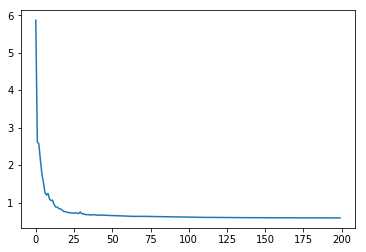

In [17]:
plt.plot(losses)
print(min(losses))

In [15]:
def predict()

SyntaxError: invalid syntax (<ipython-input-15-a095d306a341>, line 1)